<center>
    <h2 style='color:red'>Dự đoán khách hàng rời bỏ của công ty viễn thông Telco tại Mỹ</h2>
</center>


# Mô tả tập dữ liệu:
#Tập dữu liệu lưu trữ thông tin về khách hàng của một công ty cung cấp các dịch vụ viễn thông, tập dữ liệu bao gồm 7043 bản ghi, tương ứng 7043 khách hàng, mỗi khách hàng có 21 thuộc tính:---
- **customerID:** Mã khách hàng duy nhất. Mỗi khách hàng sẽ có một mã định danh riêng.
- **gender:** Giới tính của khách hàng. (Male: Nam, Female: Nữ).
- **SeniorCitizen:** Khách hàng có phải là người cao tuổi không. (0: Không, 1: Có).
- **Partner:** Khách hàng có sống cùng bạn đời (đã kết hôn hoặc quan hệ lâu dài) không. (Yes hoặc No).
- **Dependents:** Khách hàng có người phụ thuộc (con cái hoặc người thân) không. (Yes hoặc No).
- **tenure:** Số tháng mà khách hàng đã sử dụng dịch vụ.
- **PhoneService:**	Khách hàng có sử dụng dịch vụ điện thoại không. (Yes hoặc No).
- **MultipleLines:** Khách hàng có sử dụng nhiều đường dây điện thoại không. (Yes, No, hoặc No phone service).
- **InternetService:** Loại dịch vụ Internet mà khách hàng đang sử dụng. (DSL, Fiber optic, hoặc No).
- **OnlineSecurity:**	Khách hàng có sử dụng dịch vụ bảo mật trực tuyến không. (Yes, No, hoặc No internet service).
- **OnlineBackup:** Khách hàng có sử dụng dịch vụ sao lưu trực tuyến không. (Yes, No, hoặc No internet service).
- **DeviceProtection:** Khách hàng có sử dụng dịch vụ bảo vệ thiết bị không. (Yes, No, hoặc No internet service).
- **TechSupport:** Khách hàng có sử dụng dịch vụ hỗ trợ kỹ thuật không. (Yes, No, hoặc No internet service).
- **StreamingTV:** Khách hàng có sử dụng dịch vụ truyền hình trực tuyến không. (Yes, No, hoặc No internet service).
- **StreamingMovies:** Khách hàng có sử dụng dịch vụ xem phim trực tuyến không. (Yes, No, hoặc No internet service).
- **Contract:** Loại hợp đồng của khách hàng. (Month-to-month, One year, hoặc Two year).
- **PaperlessBilling:** Khách hàng có sử dụng hóa đơn điện tử không. (Yes hoặc No).
- **PaymentMethod:** Phương thức thanh toán của khách hàng. (Electronic check, Mailed check, Bank transfer, hoặc Credit card).
- **MonthlyCharges:** Chi phí hàng tháng của khách hàng.
- **TotalCharges:** Tổng chi phí mà khách hàng đã thanh toán kể từ khi bắt đầu sử dụng dịch vụ.
- **Churn:** Khách hàng có rời bỏ dịch vụ hay không. (Yes: Rời bỏ, No: Không rời bỏ).
---

# Import thư viện cần thiết

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# Khám phá dữ liệu

In [2]:
# Đọc 5 dòng đầu tiên 
df = pd.read_csv("customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Đọc 5 dòng đầu tiên 
df = pd.read_csv("customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Đếm số lượng khách hàng rời bỏ và ở lại
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- Có 5147 khách hàng ở lại
- Có 1869 khách hàng rời bỏ

In [6]:
# Tính tỷ lệ phần trăm khách hàng rời bỏ 
5174 * 100 / df.shape[0] 

73.46301292063042

- Tỷ lệ khách hàng ở lại chiếm 73,4%

# Làm sạch dữ liệu

In [7]:
#Tạo bản sao
df1 = df.copy()

In [8]:
# Xóa cột 'customerID'
df1.drop('customerID', axis='columns', inplace=True)

In [9]:
#Kiểm tra giá trị trùng lặp
df.duplicated().sum()

0

- Có 22 giá trị trùng lặp

In [10]:
#Xoá các giá trị trùng lặp
df1.drop_duplicates(inplace=True)
df1.reset_index(inplace=True, drop=True)
#Kiểm tra lại
df1.duplicated().sum()

0

- Có 0 giá trị bị lặp

In [11]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Kiểm tra xem có giá trị nào bị sai chính tả hay không phải giá trị duy nhất không
unique_gender = df1['gender'].unique()
unique_Partner = df1['Partner'].unique()
unique_Dependents = df1['Dependents'].unique()
unique_PhoneService = df1['PhoneService'].unique()
unique_MultipleLines = df1['MultipleLines'].unique()
unique_InternetService = df1['InternetService'].unique()
unique_OnlineSecurity = df1['OnlineSecurity'].unique()
unique_OnlineBackup = df1['OnlineBackup'].unique()
unique_DeviceProtection = df1['DeviceProtection'].unique()
unique_TechSupport = df1['TechSupport'].unique()
unique_StreamingTV = df1['StreamingTV'].unique()
unique_StreamingMovies = df1['StreamingMovies'].unique()
unique_Contract = df1['Contract'].unique()
unique_PaperlessBilling = df1['PaperlessBilling'].unique()
unique_PaymentMethod = df1['PaymentMethod'].unique()
unique_Churn = df1['Churn'].unique()
print("Các giá trị duy nhất trong cột 'Gender':", unique_gender)
print("Các giá trị duy nhất trong cột 'Partner':", unique_Partner)
print("Các giá trị duy nhất trong cột 'Dependents':", unique_Dependents)
print("Các giá trị duy nhất trong cột 'PhoneService':", unique_PhoneService)
print("Các giá trị duy nhất trong cột 'MultipleLines':", unique_MultipleLines)
print("Các giá trị duy nhất trong cột 'InternetService':", unique_InternetService)
print("Các giá trị duy nhất trong cột 'OnlineSecurity':", unique_OnlineSecurity)
print("Các giá trị duy nhất trong cột 'OnlineBackup':", unique_OnlineBackup)
print("Các giá trị duy nhất trong cột 'DeviceProtection':", unique_DeviceProtection)
print("Các giá trị duy nhất trong cột 'TechSupport':", unique_TechSupport)
print("Các giá trị duy nhất trong cột 'StreamingTV':", unique_StreamingTV)
print("Các giá trị duy nhất trong cột 'StreamingMovies':", unique_StreamingMovies)
print("Các giá trị duy nhất trong cột 'Contract':", unique_Contract)
print("Các giá trị duy nhất trong cột 'PaperlessBilling':", unique_PaperlessBilling)
print("Các giá trị duy nhất trong cột 'PaymentMethod':", unique_PaymentMethod)
print("Các giá trị duy nhất trong cột 'Churn':", unique_Churn)

Các giá trị duy nhất trong cột 'Gender': ['Female' 'Male']
Các giá trị duy nhất trong cột 'Partner': ['Yes' 'No']
Các giá trị duy nhất trong cột 'Dependents': ['No' 'Yes']
Các giá trị duy nhất trong cột 'PhoneService': ['No' 'Yes']
Các giá trị duy nhất trong cột 'MultipleLines': ['No phone service' 'No' 'Yes']
Các giá trị duy nhất trong cột 'InternetService': ['DSL' 'Fiber optic' 'No']
Các giá trị duy nhất trong cột 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Các giá trị duy nhất trong cột 'OnlineBackup': ['Yes' 'No' 'No internet service']
Các giá trị duy nhất trong cột 'DeviceProtection': ['No' 'Yes' 'No internet service']
Các giá trị duy nhất trong cột 'TechSupport': ['No' 'Yes' 'No internet service']
Các giá trị duy nhất trong cột 'StreamingTV': ['No' 'Yes' 'No internet service']
Các giá trị duy nhất trong cột 'StreamingMovies': ['No' 'Yes' 'No internet service']
Các giá trị duy nhất trong cột 'Contract': ['Month-to-month' 'One year' 'Two year']
Các giá trị duy nhất trong c

In [13]:
# Thay thế giá trị trong cột chứa "No internet service" và "No phone service" chuyển thành "No"
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [14]:
#Kiểm tra lại
unique_gender = df1['gender'].unique()
unique_Partner = df1['Partner'].unique()
unique_Dependents = df1['Dependents'].unique()
unique_PhoneService = df1['PhoneService'].unique()
unique_MultipleLines = df1['MultipleLines'].unique()
unique_InternetService = df1['InternetService'].unique()
unique_OnlineSecurity = df1['OnlineSecurity'].unique()
unique_OnlineBackup = df1['OnlineBackup'].unique()
unique_DeviceProtection = df1['DeviceProtection'].unique()
unique_TechSupport = df1['TechSupport'].unique()
unique_StreamingTV = df1['StreamingTV'].unique()
unique_StreamingMovies = df1['StreamingMovies'].unique()
unique_Contract = df1['Contract'].unique()
unique_PaperlessBilling = df1['PaperlessBilling'].unique()
unique_PaymentMethod = df1['PaymentMethod'].unique()
unique_Churn = df1['Churn'].unique()
print("Các giá trị duy nhất trong cột 'Gender':", unique_gender)
print("Các giá trị duy nhất trong cột 'Partner':", unique_Partner)
print("Các giá trị duy nhất trong cột 'Dependents':", unique_Dependents)
print("Các giá trị duy nhất trong cột 'PhoneService':", unique_PhoneService)
print("Các giá trị duy nhất trong cột 'MultipleLines':", unique_MultipleLines)
print("Các giá trị duy nhất trong cột 'InternetService':", unique_InternetService)
print("Các giá trị duy nhất trong cột 'OnlineSecurity':", unique_OnlineSecurity)
print("Các giá trị duy nhất trong cột 'OnlineBackup':", unique_OnlineBackup)
print("Các giá trị duy nhất trong cột 'DeviceProtection':", unique_DeviceProtection)
print("Các giá trị duy nhất trong cột 'TechSupport':", unique_TechSupport)
print("Các giá trị duy nhất trong cột 'StreamingTV':", unique_StreamingTV)
print("Các giá trị duy nhất trong cột 'StreamingMovies':", unique_StreamingMovies)
print("Các giá trị duy nhất trong cột 'Contract':", unique_Contract)
print("Các giá trị duy nhất trong cột 'PaperlessBilling':", unique_PaperlessBilling)
print("Các giá trị duy nhất trong cột 'PaymentMethod':", unique_PaymentMethod)
print("Các giá trị duy nhất trong cột 'Churn':", unique_Churn)

Các giá trị duy nhất trong cột 'Gender': ['Female' 'Male']
Các giá trị duy nhất trong cột 'Partner': ['Yes' 'No']
Các giá trị duy nhất trong cột 'Dependents': ['No' 'Yes']
Các giá trị duy nhất trong cột 'PhoneService': ['No' 'Yes']
Các giá trị duy nhất trong cột 'MultipleLines': ['No' 'Yes']
Các giá trị duy nhất trong cột 'InternetService': ['DSL' 'Fiber optic' 'No']
Các giá trị duy nhất trong cột 'OnlineSecurity': ['No' 'Yes']
Các giá trị duy nhất trong cột 'OnlineBackup': ['Yes' 'No']
Các giá trị duy nhất trong cột 'DeviceProtection': ['No' 'Yes']
Các giá trị duy nhất trong cột 'TechSupport': ['No' 'Yes']
Các giá trị duy nhất trong cột 'StreamingTV': ['No' 'Yes']
Các giá trị duy nhất trong cột 'StreamingMovies': ['No' 'Yes']
Các giá trị duy nhất trong cột 'Contract': ['Month-to-month' 'One year' 'Two year']
Các giá trị duy nhất trong cột 'PaperlessBilling': ['Yes' 'No']
Các giá trị duy nhất trong cột 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Cr

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [16]:
#Kiểm tra giá trị trong cột TotalCharges
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

- Cột TotalCharges đang là dữ liệu kiểu chuỗi

In [17]:
# Chuyển đổi cột TotalCharges thành số và kiểm tra các giá trị không hợp lệ (NaN)
pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7016    False
7017    False
7018    False
7019    False
7020    False
Name: TotalCharges, Length: 7021, dtype: bool

- Kết quả trả về kết quả False vậy là không có giá trị Nan

In [18]:
#Kiểm tra lại
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

- Kết quả cột TotalCharges vẫn là kiểu chuỗi, vậy tức là có 1 số giá trị là rỗng không thể chuyển thành số

In [19]:
# Lọc ra các hàng có giá trị TotalCharges không thể chuyển đổi thành số
df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1081,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1338,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3323,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3817,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4370,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5207,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6652,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- Có 11 hàng chứa giá trị chuỗi rỗng 

In [20]:
# Tạo 1 datafame mới không chứa giá trị rỗng
df2 = df1[df1.TotalCharges != ' ']
df2.shape

(7010, 20)

In [21]:
# Chuyển đổi TotalCharges từ chuỗi sang số
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)
df2.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [22]:
# Chuyển đổi các cột có giá trị "Yes" thành 1 và "No" thành 0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df2[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [23]:
# Chuyển đổi cột "gender" có giá trị Female thành 1 và Male thành 0
df2['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [24]:
#Kiểm tra lại 
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
# Chuyển đổi các cột có nhiều hơn 2 giá trị sang số bằng onehot
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

In [26]:
# Chuẩn hoá dữ liệu bằng Min Max
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
#Kiểm tra lại
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7020
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7010 non-null   int64  
 1   SeniorCitizen                            7010 non-null   int64  
 2   Partner                                  7010 non-null   int64  
 3   Dependents                               7010 non-null   int64  
 4   tenure                                   7010 non-null   float64
 5   PhoneService                             7010 non-null   int64  
 6   MultipleLines                            7010 non-null   int64  
 7   OnlineSecurity                           7010 non-null   int64  
 8   OnlineBackup                             7010 non-null   int64  
 9   DeviceProtection                         7010 non-null   int64  
 10  TechSupport                              7010 non-nul

### Trực quan hoá dữ liệu

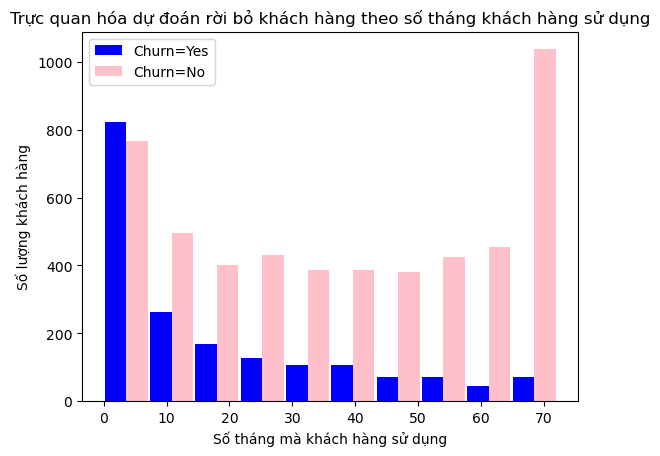

In [28]:
# Lọc dữ liệu khách hàng có churn (rời đi)
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

# Vẽ biểu đồ histogram so sánh
plt.xlabel("Số tháng mà khách hàng sử dụng")
plt.ylabel("Số lượng khách hàng")
plt.title("Trực quan hóa dự đoán rời bỏ khách hàng theo số tháng khách hàng sử dụng")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue', 'pink'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

### Nhận xét:
- **Khách hàng rời bỏ (Churn=Yes):**
  - Tập trung chủ yếu ở giai đoạn sử dụng ngắn hạn (0-10 tháng) -> Khách hàng mới sử dụng dịch vụ có xu hướng rời bỏ cao hơn.
  - Rất ít khách hàng rời bỏ sau khi đã sử dụng dịch vụ lâu dài (> 30 tháng).
- **Khách hàng không rời bỏ (Churn=No):**
  - Phân bổ đều hơn, nhưng tập trung nhiều nhất ở khoảng 70 tháng -> Những khách hàng sử dụng dịch vụ lâu dài có xu hướng trung thành hơn và không rời bỏ.
- **Sự khác biệt rõ rệt:**
  - Trong giai đoạn sử dụng ngắn hạn (0-10 tháng), lượng khách hàng rời bỏ rất cao so với lượng khách hàng ở các giai đoạn khác.
  - Điều này cho thấy dịch vụ cần cải thiện trải nghiệm của khách hàng trong những tháng đầu tiên để giảm tỷ lệ rời bỏ.
---
### Kết luận:
- Khách hàng mới (dưới 10 tháng) là đối tượng dễ rời bỏ nhất → Cần tập trung vào việc cải thiện dịch vụ và chăm sóc khách hàng trong giai đoạn đầu.
- Khách hàng lâu dài (trên 60 tháng) có mức độ trung thành cao hơn và ít rời bỏ hơn.

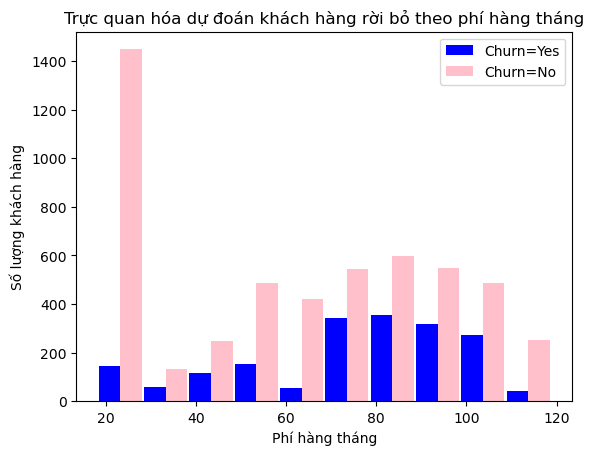

In [29]:
# Lọc dữ liệu MonthlyCharges theo Churn
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

# Vẽ biểu đồ histogram so sánh
plt.xlabel("Phí hàng tháng")
plt.ylabel("Số lượng khách hàng")
plt.title("Trực quan hóa dự đoán khách hàng rời bỏ theo phí hàng tháng")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue', 'pink'], label=['Churn=Yes', 'Churn=No'])
plt.legend()


### Nhận xét:
- **Phí hàng tháng thấp (20 - 40):**
  - Số lượng khách hàng không rời bỏ (màu hồng) chiếm đa số.
  - Rất ít khách hàng rời bỏ (màu xanh dương).
- **Phí hàng tháng trung bình (40 - 70):**
  - Tỷ lệ khách hàng rời bỏ (Churn=Yes) bắt đầu tăng dần lên.
  - Khách hàng vẫn sử dụng dịch vụ (Churn=No) vẫn chiếm ưu thế nhưng giảm nhẹ.
- **Phí hàng tháng cao (70 - 120):**
  - Số lượng khách hàng rời bỏ dịch vụ (Churn=Yes) tăng rõ rệt khi phí hàng tháng cao hơn.
  - Đặc biệt, khi phí hàng tháng vượt ngưỡng 80 - 100, số lượng khách hàng rời bỏ gần tương đương với khách hàng duy trì dịch vụ.
  - Từ 100-120, số lượng khách hàng rời bỏ giảm, có thể là họ là những khách hàng trung thành, hoặc hài lòng với phí dịch vụ cao nên ít rời bỏ
---
### Kết luận:
- Phí hàng tháng thấp (20 - 40): Khách hàng ít có xu hướng rời bỏ.
- Phí hàng tháng cao (70 - 100): Tỷ lệ khách hàng rời bỏ tăng đáng kể, chứng tỏ chi phí cao có thể là một yếu tố dẫn đến churn.

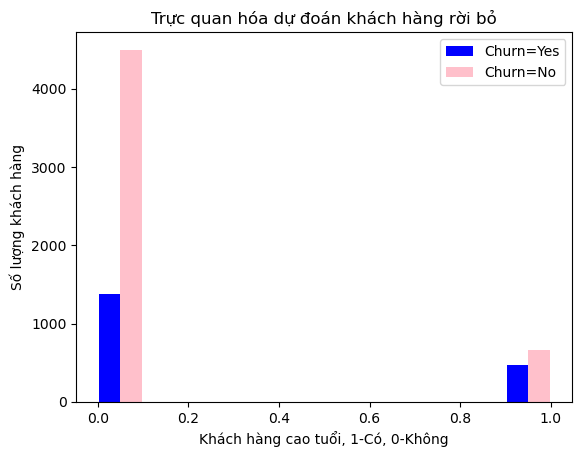

In [30]:
# Lọc dữ liệu khách hàng cao tuổi theo Churn
mc_churn_no = df1[df1.Churn == 'No'].SeniorCitizen
mc_churn_yes = df1[df1.Churn == 'Yes'].SeniorCitizen

# Vẽ biểu đồ histogram so sánh
plt.xlabel("Khách hàng cao tuổi, 1-Có, 0-Không")
plt.ylabel("Số lượng khách hàng")
plt.title("Trực quan hóa dự đoán khách hàng rời bỏ")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue', 'pink'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

### Nhận xét:
- **Khách hàng không phải người cao tuổi (SeniorCitizen = 0):**
  - Số lượng khách hàng không rời bỏ (Churn=No) rất lớn (phần màu hồng chiếm ưu thế).
  - Số lượng khách hàng rời bỏ (Churn=Yes) cũng đáng kể nhưng nhỏ hơn nhiều so với nhóm không rời bỏ.
- **Khách hàng cao tuổi (SeniorCitizen = 1):**
  - Cả khách hàng rời bỏ và không rời bỏ dịch vụ có số lượng thấp hơn so với nhóm không cao tuổi.
  - Tuy nhiên, tỷ lệ khách hàng rời bỏ dịch vụ (màu xanh dương) chiếm phần lớn hơn so với nhóm không cao tuổi.
---
### Kết luận:
- **Nhóm khách hàng không cao tuổi (SeniorCitizen = 0):**
  - Chiếm tỷ lệ lớn trong tổng số khách hàng.
  - Tỷ lệ khách hàng không rời bỏ (Churn=No) chiếm đa số.
  - Tuy nhiên, một phần khách hàng vẫn rời bỏ, cho thấy cần quan tâm đến nhóm này.
- **Nhóm khách hàng cao tuổi (SeniorCitizen = 1):**
  - Số lượng khách hàng ít hơn đáng kể.
  - Tỷ lệ rời bỏ dịch vụ cao hơn so với nhóm không cao tuổi.
  - Điều này có thể chỉ ra rằng khách hàng cao tuổi dễ rời bỏ dịch vụ hơn.

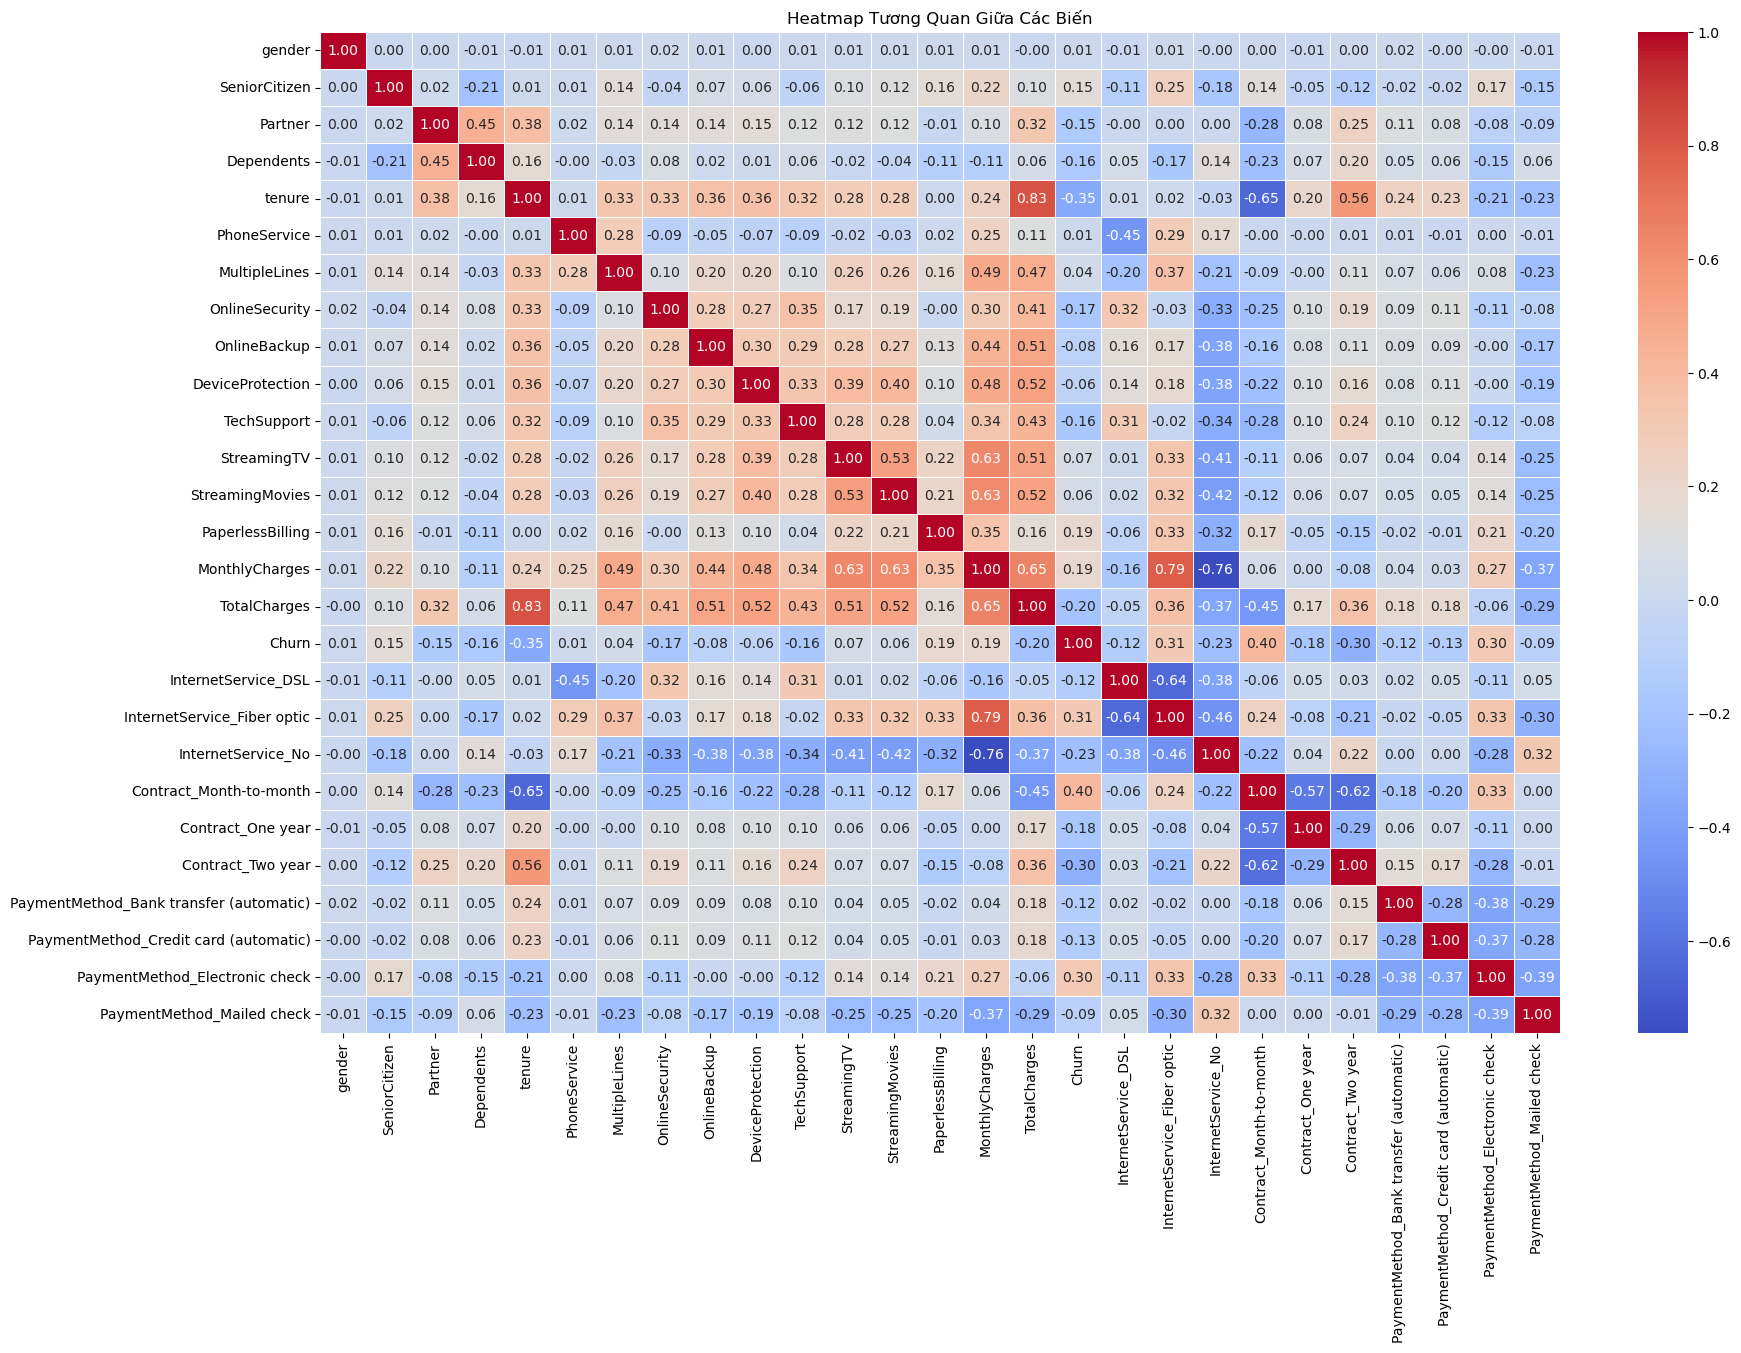

In [31]:
# Tính ma trận tương quan
correlation_matrix = df3.corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Tương Quan Giữa Các Biến")
plt.show()


### Nhận xét:
- **Contract_Month-to-month và Churn:** Tương quan dương cao (0.45) -> Khách hàng có hợp đồng Month-to-month có khả năng rời bỏ cao hơn.
- **Contract_One year và Contract_Two year với Churn:** Tương quan âm lần lượt là -0.18 và -0.31 -> Hợp đồng dài hạn giúp giữ chân khách hàng tốt hơn.
- **InternetService_Fiber optic và Churn:** Tương quan dương 0.31 -> Khách hàng dùng Fiber optic có khả năng rời bỏ cao hơn, có thể do chi phí dịch vụ Fiber optic cao hoặc chất lượng dịch vụ không tương xứng.
- **InternetService_No và Churn:** Tương quan âm -0.23 → Khách hàng không sử dụng Internet có khả năng rời bỏ thấp hơn.
- **PaymentMethod_Electronic check và Churn:** Tương quan dương 0.25 -> Khách hàng thanh toán qua Electronic check có tỷ lệ rời bỏ cao hơn.
- **PaymentMethod_Bank transfer và PaymentMethod_Credit card:** Tương quan âm nhẹ với Churn -> Thanh toán tự động qua ngân hàng hoặc thẻ tín dụng có thể giúp giữ chân khách hàng. 

### Kết luận:
- **Các yếu tố có ảnh hưởng mạnh đến Churn:**
  - Hợp đồng ngắn hạn (Month-to-month) làm tăng tỷ lệ rời bỏ.
  - Chi phí hàng tháng cao cũng liên quan đến tỷ lệ Churn.
  - Khách hàng dùng Fiber optic Internet có khả năng rời bỏ cao hơn.
- **Các yếu tố giúp giữ chân khách hàng:**
  - Hợp đồng dài hạn (One year, Two year).
  - Phương thức thanh toán tự động như ngân hàng hoặc thẻ tín dụng.
  - Khách hàng gắn bó lâu dài (tenure cao) ít có khả năng rời bỏ.
- **Đề xuất:**
  - Tạo chính sách khuyến khích hợp đồng dài hạn để giảm tỷ lệ Churn.
  - Xem xét lại chất lượng dịch vụ Fiber optic và đưa ra các gói cước phù hợp hơn.
  - Hỗ trợ chuyển đổi sang phương thức thanh toán tự động để tăng sự gắn bó.
  - Nghiên cứu sâu hơn lý do rời bỏ dịch vụ của khách hàng cao tuổi: Có thể do họ gặp khó khăn trong sử dụng dịch vụ hoặc vấn đề chi phí, đề xuất các chính sách hỗ trợ đặc biệt như chăm sóc khách hàng ưu tiên hoặc gói dịch vụ dành riêng cho người cao tuổi.


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7020
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7010 non-null   int64  
 1   SeniorCitizen                            7010 non-null   int64  
 2   Partner                                  7010 non-null   int64  
 3   Dependents                               7010 non-null   int64  
 4   tenure                                   7010 non-null   float64
 5   PhoneService                             7010 non-null   int64  
 6   MultipleLines                            7010 non-null   int64  
 7   OnlineSecurity                           7010 non-null   int64  
 8   OnlineBackup                             7010 non-null   int64  
 9   DeviceProtection                         7010 non-null   int64  
 10  TechSupport                              7010 non-nul

Churn
0    5153
1    1857
Name: count, dtype: int64


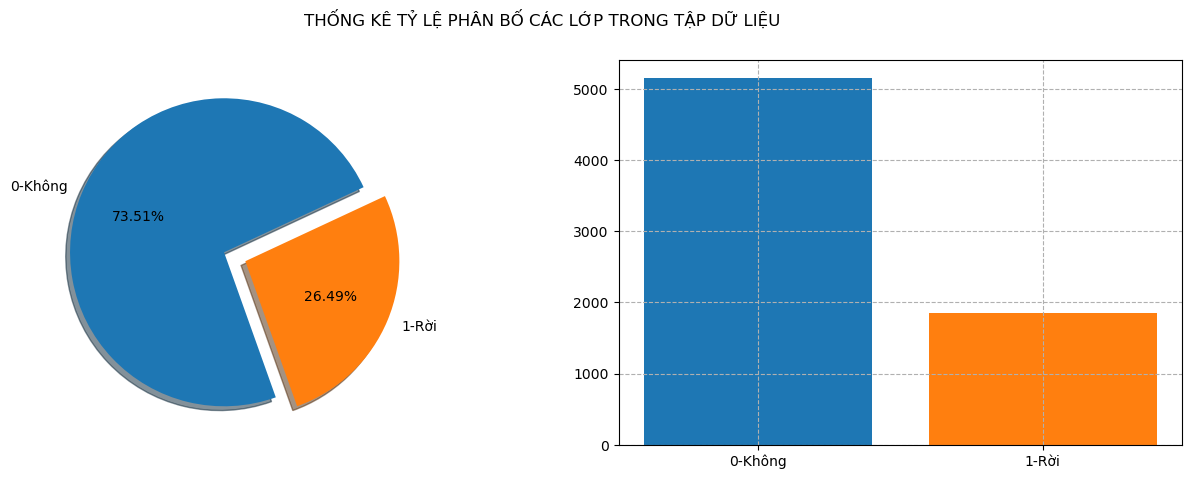

In [33]:
import matplotlib.pyplot as plt
class_y = df3['Churn'].value_counts()
labels ="0-Không", "1-Rời"
print(class_y)
#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu mẫu:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU', fontsize=12)
plt.show()

In [34]:
df3.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [35]:
# Khai báo biến X và Y
X = df3.drop('Churn', axis='columns')
y = df3.Churn.astype(np.float32)

# Xây dựng mô hình

In [36]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 5153, 1.0: 1857})


In [37]:
# Sử dụng Phương pháp SMOTE để sinh thêm mẫu cho tập thiểu số
from imblearn.over_sampling import SMOTE
# Tham số sampling_strategy thiết lập tỷ lệ tạo mẫu của tập thiểu số với tập đa số
# Tham số k_neighbors thiết lập số mẫu láng giềng gần nhất sử dụng để sinh mẫu
oversample = SMOTE(sampling_strategy=0.9, 
                   k_neighbors=8)
X12, y12 = oversample.fit_resample(X, y)

df = pd.DataFrame(X12, columns=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check'])  
df['Churn'] = y12

# Lưu DataFrame vào file CSV
df.to_csv('balanced_data.csv', index=False)
counter12 = Counter(y12)
print(counter12)

Counter({0.0: 5153, 1.0: 4637})


In [38]:
#Đọc file dữ liệu mới sau khi đã cân bằng
df3_balanced = pd.read_csv('balanced_data.csv')
df3_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   9790 non-null   int64  
 1   SeniorCitizen                            9790 non-null   int64  
 2   Partner                                  9790 non-null   int64  
 3   Dependents                               9790 non-null   int64  
 4   tenure                                   9790 non-null   float64
 5   PhoneService                             9790 non-null   int64  
 6   MultipleLines                            9790 non-null   int64  
 7   OnlineSecurity                           9790 non-null   int64  
 8   OnlineBackup                             9790 non-null   int64  
 9   DeviceProtection                         9790 non-null   int64  
 10  TechSupport                              9790 no

In [39]:
# Khai báo biến X và Y
X = df3_balanced.drop('Churn', axis='columns')
y = df3_balanced.Churn.astype(np.float32)

In [40]:
# Chia 2 tệp Train và Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
#Dữ liệu trong tệp train
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6848,1,0,1,1,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
9552,1,1,0,0,0.149826,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6416,1,0,0,0,0.436620,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6142,0,1,0,0,0.042254,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7315,0,0,0,0,0.367370,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,1,0,0,0,0.020513,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1953,0,0,0,0,0.098592,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6759,0,0,0,0,0.253521,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5925,0,0,1,0,0.971831,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [42]:
y_train

6848    0.0
9552    1.0
6416    0.0
6142    0.0
7315    1.0
       ... 
8334    1.0
1953    0.0
6759    1.0
5925    0.0
6625    0.0
Name: Churn, Length: 7832, dtype: float32

In [43]:
#Dữ liệu trong tệp test
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5347,1,0,1,1,0.901408,1,1,1,1,0,...,1,0,0,0,0,1,1,0,0,0
8728,0,1,0,0,0.478873,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8049,0,0,0,0,0.006717,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3001,1,0,0,0,0.394366,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
7958,0,0,0,0,0.194894,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9439,0,0,0,0,0.238875,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8828,0,0,0,0,0.041186,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9566,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
8522,1,1,0,0,0.038435,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
y_test

5347    0.0
8728    1.0
8049    1.0
3001    0.0
7958    1.0
       ... 
9439    1.0
8828    1.0
9566    1.0
8522    1.0
4395    1.0
Name: Churn, Length: 1958, dtype: float32

In [45]:
#Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)   

LogisticRegression()

In [46]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)
print("Dự đoán", y_pred[:5])

Dự đoán [0. 1. 1. 0. 1.]


# Đánh giá mô hình

In [47]:
# Tính độ chính xác của mô hình trên tập test
acc = model.score(X_test, y_test)
print("Độ chính xác", acc)

Độ chính xác 0.797752808988764


- Mô hình đạt 77% độ chính xác

In [48]:
# In báo cáo phân loại
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1031
         1.0       0.77      0.81      0.79       927

    accuracy                           0.80      1958
   macro avg       0.80      0.80      0.80      1958
weighted avg       0.80      0.80      0.80      1958



### Nhận xét:
- **Lớp 0.0 (Không Rời Bỏ):**
  - Precision (Độ chính xác): 0.8. Trong tất cả dự đoán lớp 0.0, có 76% là chính xác.
  - Recall (Độ nhạy): 0.73. Trong tất cả các mẫu thực tế thuộc lớp 0.0, mô hình dự đoán đúng 73%.
  - F1-score: 0.76. Trung bình điều hòa giữa precision và recall.
---
- **Lớp 1.0 (Rời Bỏ):**
- Precision (Độ chính xác): 0.75. Trong tất cả dự đoán lớp 1.0, có 73% là chính xác.
- Recall (Độ nhạy): 0.81. Trong tất cả các mẫu thực tế thuộc lớp 1.0, mô hình dự đoán đúng 77%.
- F1-score: 0.78.  Trung bình điều hòa giữa precision và recall.
---
- **Macro Avg: Trung bình không trọng số của các chỉ số precision, recall và f1-score:**
  - Precision, Recall và F1-score đều là 0.77, cho thấy hiệu suất mô hình khá cân bằng giữa hai lớp.
- **Weighted Avg: Trung bình trọng số của các chỉ số dựa trên support (số lượng mẫu trong mỗi lớp):**
  - Precision, Recall và F1-score cũng đều đạt 0.77.


### Kết luận:
- Hiệu suất mô hình khá tốt: Accuracy và các chỉ số trung bình đều đạt 77%, thể hiện mô hình dự đoán khá ổn định.
- Khả năng phát hiện lớp 1 (Khách hàng rời bỏ): Recall của lớp 1 đạt 77%, cao hơn lớp 0, cho thấy mô hình phát hiện khá tốt khách hàng rời bỏ.
- Cân bằng giữa 2 lớp: Do dữ liệu đã được cân bằng bằng kỹ thuật over sampling, các chỉ số giữa lớp 0 và lớp 1 tương đối cân bằng.

### Chạy thử mô hình với dữ liệu mới

In [49]:
# 1. Tạo dữ liệu mới
new_data = pd.DataFrame({
    "gender": ["Male"],  
    "SeniorCitizen": [0],  
    "Partner": ["No"],  
    "Dependents": ["No"],
    "tenure": [34],  
    "PhoneService": ["Yes"],  
    "MultipleLines": ["No"], 
    "InternetService": ["DSL"],  
    "OnlineSecurity": ["Yes"],  
    "OnlineBackup": ["Yes"],  
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],  
    "StreamingTV": ["No"],  
    "StreamingMovies": ["No"],  
    "Contract": ["Month-to-month"],  
    "PaperlessBilling": ["Yes"],  
    "PaymentMethod": ["Mailed check"],  
    "MonthlyCharges": [53.85],  
    "TotalCharges": [108.15],
})
# 2. Làm sạch và mã hóa dữ liệu mới (Tương tự như dữ liệu huấn luyện)
# Chuyển 'Yes' thành 1 và 'No' thành 0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in yes_no_columns:
    new_data[col] = new_data[col].replace({'Yes': 1, 'No': 0})
# Chuyển cột gender từ 'Male'/'Female' thành 0/1
new_data['gender'] = new_data['gender'].replace({'Female': 1, 'Male': 0})
# Mã hóa One-Hot Encoding cho các cột phân loại
new_data_encoded = pd.get_dummies(new_data, columns=['InternetService', 'Contract', 'PaymentMethod'])
new_data_encoded = new_data_encoded.astype(int)
# Đồng bộ hóa cột với X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)
# Chuẩn hóa các cột cần thiết bằng Min-Max Scaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
new_data_encoded[cols_to_scale] = scaler.fit_transform(new_data_encoded[cols_to_scale])
# Dự đoán với mô hình đã huấn luyện
predicted_churn = model.predict(new_data_encoded)
# In kết quả dự đoán
print("Dự đoán khách hàng rời bỏ: {}".format("Có" if predicted_churn[0] == 1 else "Không"))

Dự đoán khách hàng rời bỏ: Không


<center>
<h2 style='color:red'> --- Hết --- </h2>
</center>

---